# Kyphosis

https://www.udemy.com/course/data-science-in-healthcare/

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

import plot_confusion_matrix as pcm

In [2]:
kyphosis = pd.read_csv('C:/ML/kyphosis/kyphosis.csv')

In [3]:
kyphosis

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

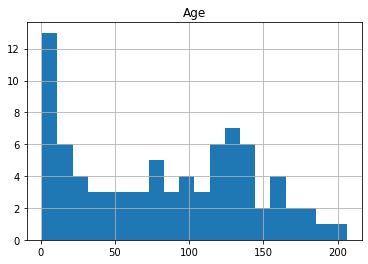

In [4]:
kyphosis.hist(column='Age',bins=20)

In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
kyphosis['Kyphosis'] = le.fit_transform(kyphosis['Kyphosis'])

In [6]:
kyphosis

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [7]:
X = kyphosis.drop(['Kyphosis'], axis=1)
y = kyphosis['Kyphosis']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, random_state=1223, criterion='entropy')

In [10]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [12]:
print(accuracy_score(y_test, y_pred))

0.84


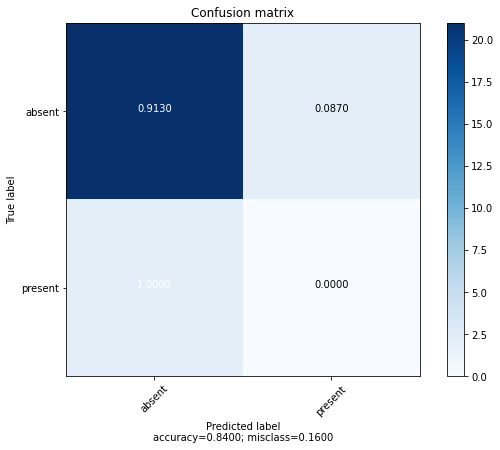

In [16]:
cm = confusion_matrix(y_test, y_pred)

pcm.plot_confusion_matrix(cm, target_names=['absent', 'present'])

In [17]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(21, 2, 2, 0)

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        23
           1       0.00      0.00      0.00         2

    accuracy                           0.84        25
   macro avg       0.46      0.46      0.46        25
weighted avg       0.84      0.84      0.84        25

